In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR,SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.naive_bayes import MultinomialNB

In [2]:
train_file = r"C:\Users\Manivas\Downloads\Train_Data.csv"
data = pd.read_csv(train_file)
data.head()

,date,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue
0,01-08-2020,campaign 1,adgroup 1,ad 1,24,6,0.08,0,0.00
1,01-08-2020,campaign 1,adgroup 2,ad 1,1,0,0.00,0,0.00
2,01-08-2020,campaign 1,adgroup 3,ad 1,13,4,0.04,0,0.00
3,01-08-2020,campaign 1,adgroup 4,ad 1,5,4,0.08,0,0.00
4,01-08-2020,campaign 1,adgroup 1,ad 2,247,126,1.29,4,925.71


# Train data

In [3]:
data = data.iloc[:,4:]
cols = list(data.columns)
data.head()

,impressions,clicks,cost,conversions,revenue
0,24,6,0.08,0,0.00
1,1,0,0.00,0,0.00
2,13,4,0.04,0,0.00
3,5,4,0.08,0,0.00
4,247,126,1.29,4,925.71


# Checking for Null values

In [4]:
data.isnull().sum()

impressions    0
clicks         0
cost           0
conversions    0
revenue        0
dtype: int64

In [5]:
data.shape

(4571, 5)

In [6]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
cols = list(data.columns)
X_cols = cols[:-1]
y_cols = cols[-1]

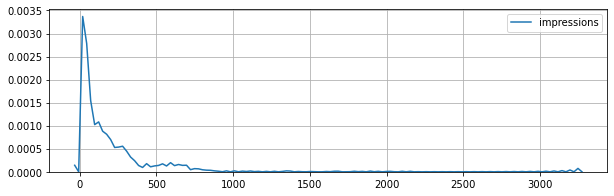

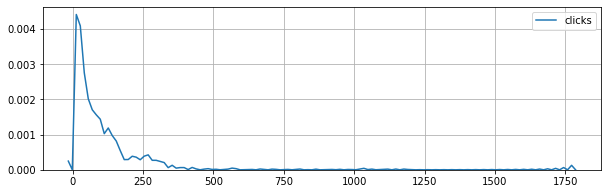

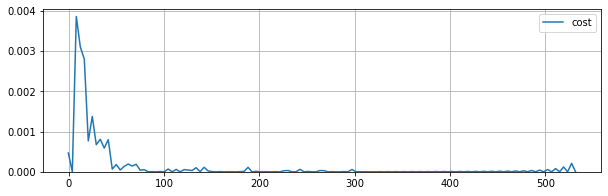

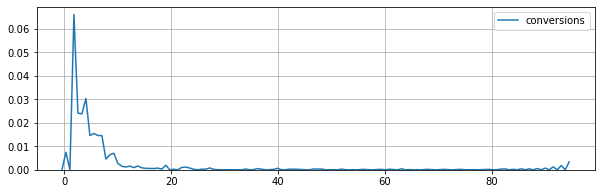

In [7]:
for i in range(len(X_cols)):
    fig, ax = plt.subplots(figsize=(10,3))
    ax.grid()
    sns.kdeplot(data=X[X_cols[i]])

# Outlier analysis

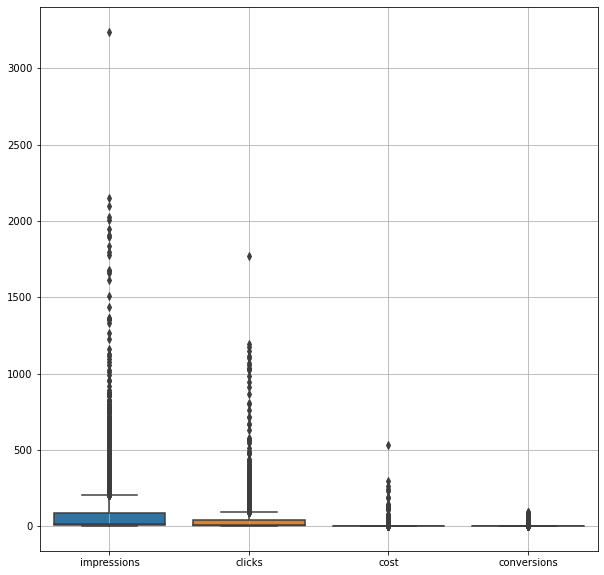

In [8]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(data=X,orient="v")
ax.grid()

# Pairplot analysis

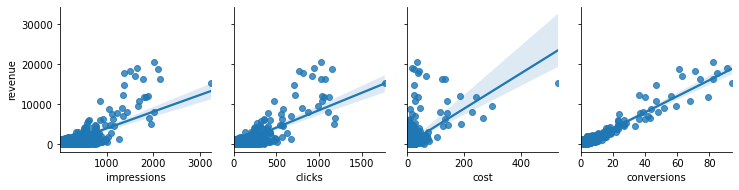

In [9]:
sns.pairplot(data,kind='reg',diag_kind='auto', x_vars=X_cols,y_vars=y_cols)

# Check for correlation between features

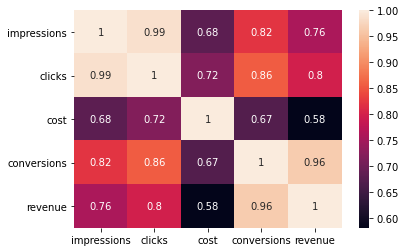

In [10]:
corr_mat = data.corr()
sns.heatmap(corr_mat, annot = True)

# Feature scaling

In [11]:
train_rmse = []
val_rmse = []

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

scaler = MinMaxScaler().fit(X_train)
X_train_minmax = scaler.transform(X_train)
X_val_minmax = scaler.transform(X_val)

scaler = StandardScaler().fit(X_train)
X_train_std = scaler.transform(X_train)
X_val_std = scaler.transform(X_val)

scaler = RobustScaler().fit(X_train)
X_train_rbst = scaler.transform(X_train)
X_val_rbst = scaler.transform(X_val)

train_X = [X_train,X_train_minmax,X_train_std,X_train_rbst]
val_X = [X_val,X_val_minmax,X_val_std,X_val_rbst]

# Training and evaluation

In [12]:
for i in range(len(train_X)):
    lr = Lasso(alpha=0.4).fit(train_X[i], y_train)
    y_pred_train = lr.predict(train_X[i])
    y_pred_val = lr.predict(val_X[i])
    rmse_train = np.sqrt(mean_squared_error(y_train,y_pred_train))
    train_rmse.append(rmse_train)
    rmse_val = np.sqrt(mean_squared_error(y_val,y_pred_val))
    val_rmse.append(rmse_val)

    
pd.DataFrame({'RMSE (train)':train_rmse,'RMSE (cross-val)':val_rmse},index=['Original','Min-max scaled','Standardized',
                                                                            'Robust'])

,RMSE (train),RMSE (cross-val)
Original,274.942192,202.785587
Min-max scaled,278.828053,195.688498
Standardized,275.007263,202.538178
Robust,274.950708,202.801711


# Outlier rejection based on IQR

In [13]:
Q1 = data.iloc[:,:-1].quantile(0.25)
Q3 = data.iloc[:,:-1].quantile(0.75)
IQR = Q3-Q1
lower_lim = Q1-1.5*IQR
upper_lim = Q3+1.5*IQR
data_filt = data[((data.iloc[:,:-1]>=lower_lim)&(data.iloc[:,:-1]<=upper_lim)).all(axis=1)]  

print(data_filt.shape)
data_filt.head()

(3597, 5)


,impressions,clicks,cost,conversions,revenue
0,24,6,0.08,0,0.0
1,1,0,0.00,0,0.0
2,13,4,0.04,0,0.0
3,5,4,0.08,0,0.0
5,7,2,0.04,0,0.0


In [14]:
X_filt = data_filt.iloc[:,:-1]
y_filt = data_filt.iloc[:,-1]
cols = list(data_filt.columns)
X_cols = cols[:-1]
y_cols = cols[-1]

# Box plot analysis after filtering outliers

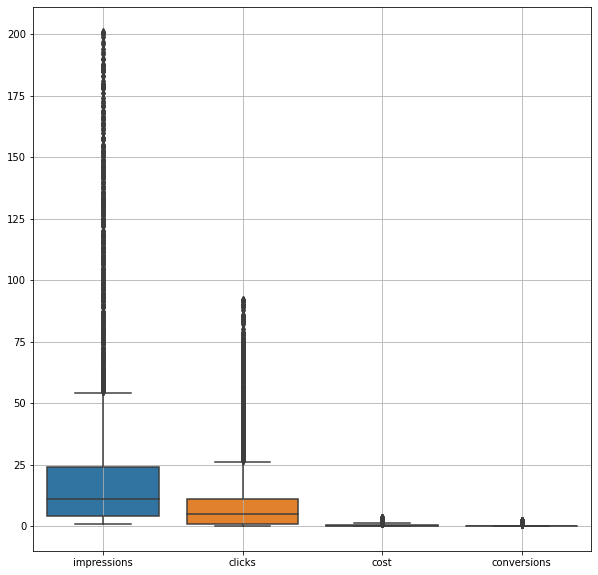

In [15]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(data=X_filt,orient="v")
ax.grid()

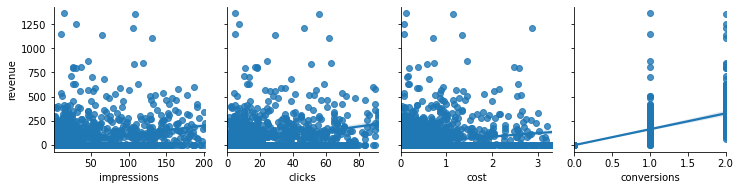

In [16]:
sns.pairplot(data_filt,kind='reg',diag_kind='auto', x_vars=X_cols,y_vars=y_cols)

# Checking correlation map between features after filtering outliers

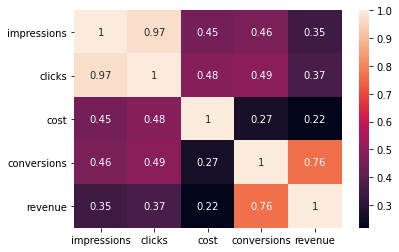

In [17]:
corr_mat = data_filt.corr()
sns.heatmap(corr_mat, annot = True)

# Feature scaling after filtering outliers

In [18]:
train_filt_rmse = []
val_filt_rmse = []

X_filt_train, X_filt_val, y_filt_train, y_filt_val = train_test_split(X_filt, y_filt, test_size=0.1, random_state=42)

scaler = MinMaxScaler().fit(X_filt_train)
X_filt_train_minmax = scaler.transform(X_filt_train)
X_filt_val_minmax = scaler.transform(X_filt_val)

scaler = StandardScaler().fit(X_filt_train)
X_filt_train_std = scaler.transform(X_filt_train)
X_filt_val_std = scaler.transform(X_filt_val)

scaler = RobustScaler().fit(X_filt_train)
X_filt_train_rbst = scaler.transform(X_filt_train)
X_filt_val_rbst = scaler.transform(X_filt_val)

train_filt_X = [X_filt_train,X_filt_train_minmax,X_filt_train_std,X_filt_train_rbst]
val_filt_X = [X_filt_val,X_filt_val_minmax,X_filt_val_std,X_filt_val_rbst]

# Training and evaluation on the filtered data

In [19]:
for i in range(len(train_filt_X)):
    lr_filt = Lasso(alpha=0.4).fit(train_filt_X[i], y_filt_train)
    y_filt_pred_train = lr_filt.predict(train_filt_X[i])
    y_filt_pred_val = lr_filt.predict(val_filt_X[i])
    rmse_train_filt = np.sqrt(mean_squared_error(y_filt_train,y_filt_pred_train))
    train_filt_rmse.append(rmse_train_filt)
    rmse_val_filt = np.sqrt(mean_squared_error(y_filt_val,y_filt_pred_val))
    val_filt_rmse.append(rmse_val_filt)

    
pd.DataFrame({'RMSE (train)':train_filt_rmse,'RMSE (cross-val)':val_filt_rmse},index=['Original','Min-max scaled',
                                                                                      'Standardized','Robust'])

,RMSE (train),RMSE (cross-val)
Original,65.964280,64.206736
Min-max scaled,66.019978,64.190328
Standardized,65.978230,64.106237
Robust,65.980834,64.131001


# Test data

In [20]:
test_file = r"C:\Users\Manivas\Downloads\Test_Data.csv"
test_data = pd.read_csv(test_file)
test_data.head()

,date,campaign,adgroup,ad,cost,impressions,clicks,conversions
0,01-03-2021,campaign 1,adgroup 1,ad 1,0.58,121,49,1
1,01-03-2021,campaign 1,adgroup 3,ad 1,0.17,22,12,0
2,01-03-2021,campaign 1,adgroup 4,ad 1,0.05,5,3,0
3,01-03-2021,campaign 1,adgroup 2,ad 1,0.01,2,1,0
4,01-03-2021,campaign 1,adgroup 2,ad 2,0.01,3,1,0


In [21]:
test_data = test_data.iloc[:,4:]
X_cols = list(test_data.columns)
test_data.head()

,cost,impressions,clicks,conversions
0,0.58,121,49,1
1,0.17,22,12,0
2,0.05,5,3,0
3,0.01,2,1,0
4,0.01,3,1,0


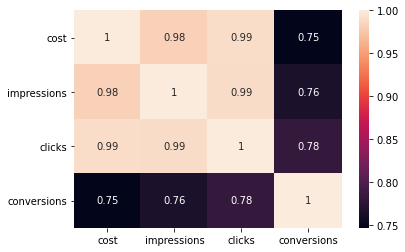

In [22]:
corr_mat = test_data.corr()
sns.heatmap(corr_mat, annot = True)

In [23]:
X_test = test_data.copy()
scaler = StandardScaler().fit(X_test)
X_test_std = scaler.transform(X_test)

# Predictons on the test data

In [24]:
y_pred_test1 = lr.predict(X_test)
y_pred_test1[y_pred_test1<0] = 0
y_pred_test1.shape

(318,)

In [25]:
y_pred_test2 = lr_filt.predict(X_test)
y_pred_test2[y_pred_test2<0] = 0
y_pred_test2.shape

(318,)

In [26]:
res = pd.DataFrame(y_pred_test1,columns=["revenue"])
out_path = "12063_submission_lasso.csv"
res.to_csv(out_path,index=False)

In [27]:
res = pd.DataFrame(y_pred_test2,columns=["revenue"])
out_path = "12063_submission_lasso_filt.csv"
res.to_csv(out_path,index=False)